In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("telecom_churn.csv")
df.head()

# from https://www.kaggle.com/barun2104/telecom-churn/notebooks

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Target Visualization  

In [ ]:
# sns.countplot(df.Churn)
# plt.title("Count Plot for Customer Churn" , fontsize=13)
# plt.xlabel("Customer Churn")
# plt.show()

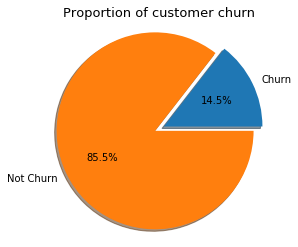

In [ ]:
labels = 'Churn', "Not Churn"
sizes = [df.Churn[df['Churn'] == 1].count(), df.Churn[df['Churn'] == 0].count()]
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

plt.title("Proportion of customer churn", fontsize=13)

plt.show()

observe that the dataset is **imbalanced** (i.e. the number of one class is much higher than the other class) 

For this data, there are 2 categorical features that is *Contract Renewal* and *Data Plan*

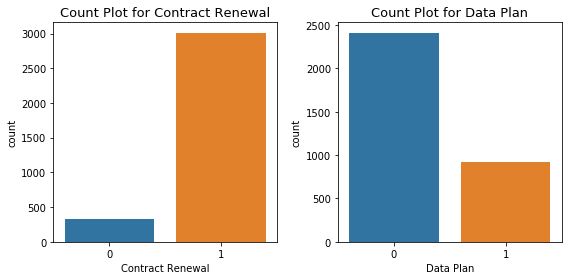

In [ ]:
ax = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(data = df , x = "ContractRenewal" )
plt.title("Count Plot for Contract Renewal" , fontsize=13)
plt.xlabel("Contract Renewal")
plt.subplot(1,2,2)
sns.countplot(data = df , x = "DataPlan")
plt.title("Count Plot for Data Plan" , fontsize=13)
plt.xlabel("Data Plan")
plt.tight_layout()
plt.show()

### Correlation Heatmap

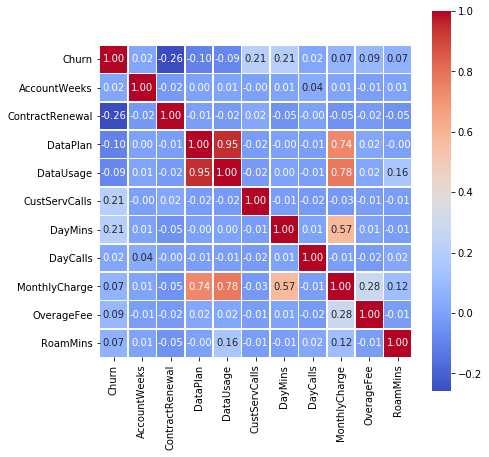

In [ ]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax, cbar=True, square=True, cmap= 'coolwarm')
plt.show()

Observe that there is no feature that is highly correlated to the target **Churn**. This doesn't mean that the features don't have any relationships with the target. In fact, they might have some non-linear relationships. So, we will use *Chi2* to determind significant features

## Univariate feature selection with Chi-square

https://scikit-learn.org/stable/modules/feature_selection.html

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 10 features
x = df.drop(["Churn"], axis=1)
y = df.Churn
select_feature = SelectKBest(chi2, k=10).fit(x, y)

In [ ]:
select_feature.scores_

array([  14.30419687,   21.80992337,   25.15695901,   50.25402323,
        160.77358805, 2314.16931468,    4.55305859,   83.49325479,
         18.36059292,   11.81308123])

In [ ]:
score_df = pd.Series(select_feature.scores_, index=x.columns)

In [ ]:
score_df.sort_values(ascending=False)

DayMins            2314.169315
CustServCalls       160.773588
MonthlyCharge        83.493255
DataUsage            50.254023
DataPlan             25.156959
ContractRenewal      21.809923
OverageFee           18.360593
AccountWeeks         14.304197
RoamMins             11.813081
DayCalls              4.553059
dtype: float64

In [ ]:
# score_df.sort_values(ascending=False).plot(kind='barh')
# plt.grid()
# plt.show() 

We see that *DayMins*, *CustServCalls*, *MonthlyCharge*, and *DataUsage* are the top4 selected features based on univariate statistical tests. 

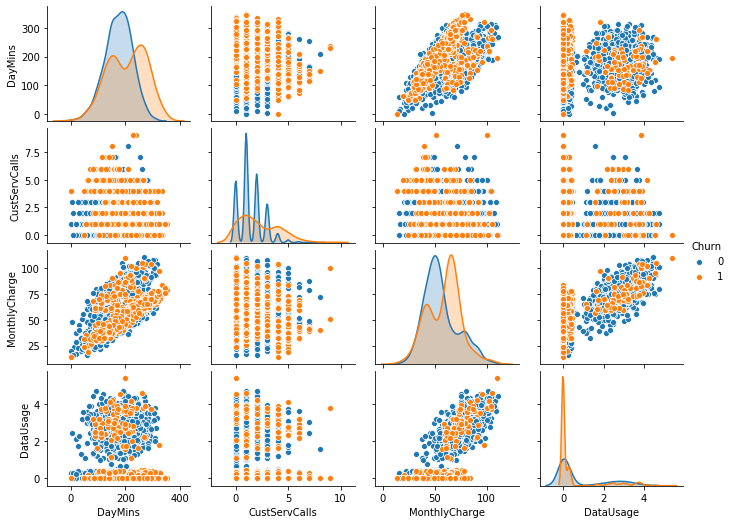

In [ ]:
g=sns.pairplot(data = df[["DayMins","CustServCalls","MonthlyCharge","DataUsage","Churn"]],
            hue="Churn")
g.fig.set_size_inches(10,7)
plt.show()

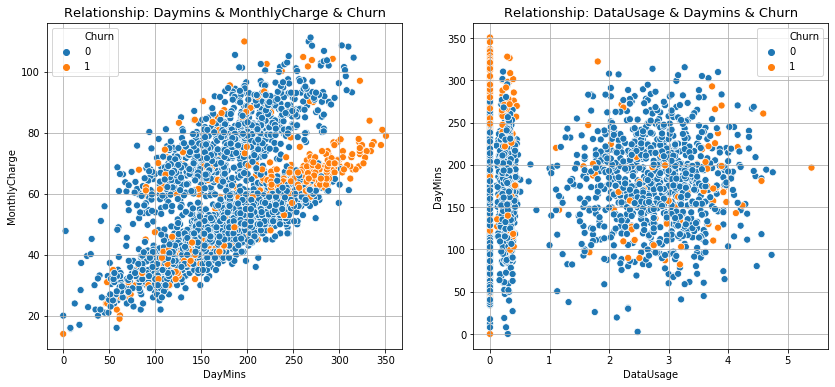

In [ ]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
#plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'DayMins', y = 'MonthlyCharge', hue = 'Churn', s=50)
plt.legend(loc='upper left')
plt.title("Relationship: Daymins & MonthlyCharge & Churn", fontsize=13)
plt.grid()


plt.subplot(1,2,2)
#plt.figure(figsize = (8,8))
sns.scatterplot(data = df, y = 'DayMins', x = 'DataUsage', hue = 'Churn', s=50)
plt.legend(loc='upper right')
plt.title("Relationship: DataUsage & Daymins & Churn", fontsize=13)
plt.grid()

plt.show()

## Feature Engineeering

In [ ]:
add_df = pd.read_csv('additional_data.csv')
add_df.head()

# from https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


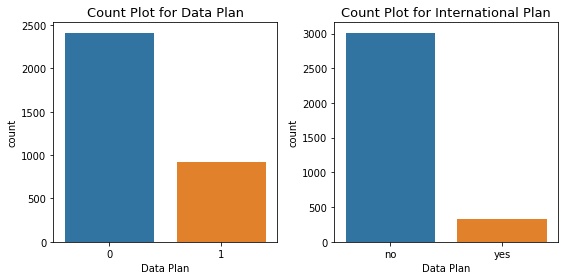

In [ ]:
ax = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(data = df , x = "DataPlan")
plt.title("Count Plot for Data Plan" , fontsize=13)
plt.xlabel("Data Plan")
plt.subplot(1,2,2)
sns.countplot(data = add_df , x = "international plan")
plt.title("Count Plot for International Plan" , fontsize=13)
plt.xlabel("Data Plan")
plt.tight_layout()
plt.show()


### Adding New Features 

In [ ]:
# make a copy of the original dataset
df_new = df

- Adding some features from the additional datset into our original dataset

In [ ]:
# add data about international usage & night time usage
new_features = {"International_Plan": add_df["international plan"], "Intl_Minutes": add_df["total intl minutes"], 
                "Intl_Calls":add_df["total intl calls"], "Intl_Charge":add_df["total intl charge"],
               "Night_minutes":add_df["total night minutes"], "Night_calls":add_df["total night calls"],
               "Night_charge":add_df["total night charge"]}

df_new = df_new.assign(**new_features)
df_new = df_new.drop(["RoamMins"], axis=1)  # because RoamMins = total Intl_Minutes

- In the orignal dataset, **MonthlyCharge = Daytime Charge + Data Usage Charge**
- Since the additional data contains a *Daytime Charge* feature, we can use it to compute *Data Usage Charge*

In [ ]:
df_new["DataCharge"] = df_new["MonthlyCharge"] - add_df["total day charge"]
df_new["DayCharge"] = add_df["total day charge"]
# now we drop monthlyCharge which is just a linear combination of 2 features
df_new = df_new.drop(["MonthlyCharge"], axis=1)

In [ ]:
# Turn International_Plan into binary
International_Plan_dict = {"no":0, "yes":1}
df_new["International_Plan"] = df_new["International_Plan"].apply(lambda line: International_Plan_dict[line])

In [ ]:
df_new.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,OverageFee,International_Plan,Intl_Minutes,Intl_Calls,Intl_Charge,Night_minutes,Night_calls,Night_charge,DataCharge,DayCharge
0,0,128,1,1,2.7,1,265.1,110,9.87,0,10.0,3,2.70,244.7,91,11.01,43.93,45.07
1,0,107,1,1,3.7,1,161.6,123,9.78,0,13.7,3,3.70,254.4,103,11.45,54.53,27.47
2,0,137,1,0,0.0,0,243.4,114,6.06,0,12.2,5,3.29,162.6,104,7.32,10.62,41.38
3,0,84,0,0,0.0,2,299.4,71,3.10,1,6.6,7,1.78,196.9,89,8.86,6.10,50.90
4,0,75,0,0,0.0,3,166.7,113,7.42,1,10.1,3,2.73,186.9,121,8.41,12.66,28.34


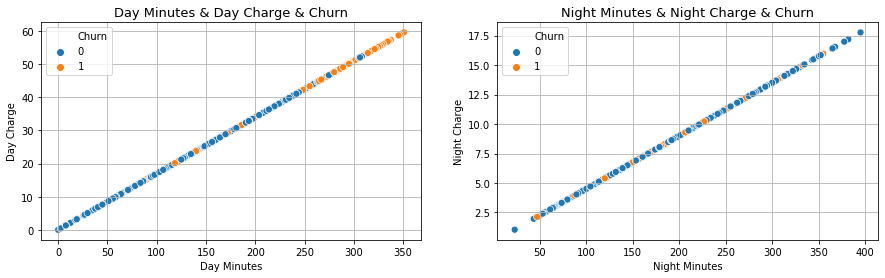

In [ ]:
ax = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.scatterplot(data = df_new, x = 'DayMins', y = 'DayCharge', hue = 'Churn', s=50)
plt.legend(loc='upper left')
plt.title("Day Minutes & Day Charge & Churn", fontsize=13)
plt.xlabel('Day Minutes')
plt.ylabel('Day Charge')
plt.grid()

plt.subplot(1,2,2)
sns.scatterplot(data = df_new, x = 'Night_minutes', y = 'Night_charge', hue = 'Churn', s=50)
plt.legend(loc='upper left')
plt.title("Night Minutes & Night Charge & Churn", fontsize=13)
plt.xlabel('Night Minutes')
plt.ylabel('Night Charge')
plt.grid()
plt.show()

- Observe that DayMins and DayCharge as a linear relationship. For customers who have daytime-minute calls higher than 250 minutes are more likely to leave the company. This shows us that the action that the company may improve is to reduce the charge for high mininutes usage during day times. (not using linear increasing scale, may use $Charge=0.05*(mins-220)+0.15*220$, for $ mins>=220$ and $Charge=0.15*mins$, for $min < 220$)

- originally we have $Charge=0.17*mins$

- we don't see any relationship for **night usages** (left figure).

In [ ]:
# this is the way we comput the slope = 0.17 of our DayCharges vs DayMins
from sklearn.linear_model import LinearRegression
x = df_new.DayMins.values.reshape(-1,1)
y = df_new.DayCharge.values.reshape(-1,1)
reg = LinearRegression().fit(x, y)
print('Coefficient: %.3f'%reg.coef_)
print('Interesection: %.3f'%reg.intercept_)

Coefficient: 0.170
Interesection: 0.001


## The promotion on Day Charge 

In [ ]:
def plot_action(new_slope=0.05): 
    x = range(0,350)
    y = []
    y_o = []
    for x in range(0,350):
        if x < 220:
            y_temp = 0.15*x
        else:
            y_temp = new_slope*(x-220) + 0.15*220
        y.append(y_temp)

    for x in range(0,350):
        y_temp = 0.17*x
        y_o.append(y_temp)

    plt.plot(range(0,350),y, '--')
    plt.plot(range(0,350),y_o, '--')
    plt.xlabel('Day Minutes')
    plt.ylabel('Day Charge')
    plt.grid()

note that we choose to reduce the charge for 220 mins+ because we think that these people may feel like having more call-mins will make them to pay even more, so if the other company has a better plan, they will leave our company.

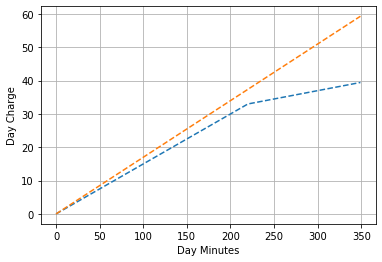

In [ ]:
# Reducing new_slope means we get less profit
# No that there is a trade-off between profit and customer persuasion
plot_action(new_slope=0.05)  # feel free to make any changes to the slope.

# Payoff Calculation

In [ ]:
# we are computing the mean/median day charge of customers who leave the company
churn_1 = df_new[df_new["Churn"] == 1]
print('mean: %.2f' %np.mean(churn_1.DayCharge))
print('standard deviation: %.2f' %np.std(churn_1.DayCharge)) 

mean: 35.18
standard deviation: 11.72


In [ ]:
def charge_after_action(new_slope=0.05): # change this slope according to our pormotion plan
    y = []
    for x in churn_1.DayMins:
        if x < 220:
            y_temp = 0.15*x
        else:
            y_temp = new_slope*(x-220) + 0.15*220
        y.append(y_temp)
    return y    

### FP payoff value

In [ ]:
# Must use the mean for simplicity
y = charge_after_action(new_slope=0.05)
cost_service_call = 1.16
FP_payoff = -((np.mean(churn_1.DayCharge) - np.mean(y))+ cost_service_call)   
print('FP payoff: %.2f'%FP_payoff)

FP payoff: -7.60


### FN payoff value

In [ ]:
y = charge_after_action(new_slope=0.05)
print('Average day charge after discount: %.2f' %np.mean(y))
FN_payoff = -(np.mean(y) + cost_service_call)
print('FN payoff: %.2f'%FN_payoff)

Average day charge after discount: 28.73
FN payoff: -29.89


### TN payoff value = 0

### TP payoff value

In [ ]:
TP_payoff = (np.mean(y) - cost_service_call)
print('TP payoff: %.2f'%TP_payoff)

TP payoff: 27.57


# Correlations of Features

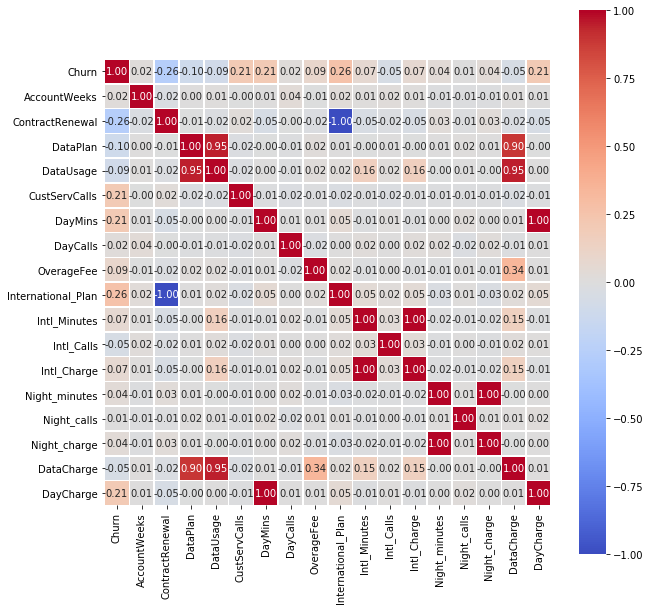

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_new.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax, cbar=True, square=True, cmap= 'coolwarm')
plt.show()

In this case, we can see that there are some features that the **correlation** between them is **exactly 1**. In statistic we may remove collinearlity.

## Univariate feature selection with Chi-square

In [ ]:
x_new = df_new.drop(["Churn"], axis=1)
y_new = df_new.Churn
select_feature_new = SelectKBest(chi2, k=10).fit(x_new, y_new)

In [ ]:
score_df_new = pd.Series(select_feature_new.scores_, index=x_new.columns)
score_df_new.sort_values(ascending=False)

DayMins               2314.169315
DayCharge              393.399658
International_Plan     203.244178
CustServCalls          160.773588
DataCharge              65.573210
Night_minutes           53.446506
DataUsage               50.254023
DataPlan                25.156959
ContractRenewal         21.809923
OverageFee              18.360593
AccountWeeks            14.304197
Intl_Calls              12.582769
Intl_Minutes            11.813081
DayCalls                 4.553059
Intl_Charge              3.190593
Night_charge             2.405542
Night_calls              0.480689
dtype: float64

In [ ]:
# Turn International_Plan, DataPlan, and ContractRenewal into binary
International_Plan_dict = {0:"no", 1:"yes"}
df_new["International_Plan"] = df_new["International_Plan"].apply(lambda line: International_Plan_dict[line])

ContractRenewal_dict = {0:"no", 1:"yes"}
df_new["ContractRenewal"] = df_new["ContractRenewal"].apply(lambda line: ContractRenewal_dict[line])

DataPlan_dict = {0:"no", 1:"yes"}
df_new["DataPlan"] = df_new["DataPlan"].apply(lambda line: DataPlan_dict[line])

In [ ]:
df_new.to_csv('ChurnCombined.csv', index=False)